<a href="https://colab.research.google.com/github/Peshniwah1/AI_Modelling_MUK/blob/main/A_machine_learning_model_to_predict_the_likelihood_of_death_from_rabies_infection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [49]:

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Reading the dataset

# General_info Dataset
Generalinfo = pd.read_csv('/content/sample_data/general_info.csv')

# rabies_bite Dataset
RabiesBites = pd.read_csv('/content/sample_data/rabies_bite.csv')


In [52]:
# merging the two dataframes on columns 'Month' and 'District'
Rabies_df = pd.merge(RabiesBites, Generalinfo, on =['Month','District'], how = 'left')

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
Rabies_df.tail()


,District,Month,Suspected cases in animals,Suspected bites by animals,Deaths,Emergency vaccinations,Dogs,Cats,Pets destroyed,Rainfall,Water,Grazing
1224,NTUNGAMO,31-Dec-02,4,2,0,0,20,3,0,1.0,2.0,2.0
1225,MUBENDE,31-Dec-02,0,0,0,0,43,4,0,3.0,2.0,3.0
1226,MASINDI,31-Dec-02,1,2,0,0,72,2,1,2.0,2.0,2.0
1227,WAKISO,31-Dec-02,8,0,0,0,163,26,5,3.0,2.0,3.0
1228,BUGIRI,31-Dec-02,1,1,0,1,0,0,0,3.0,2.0,3.0


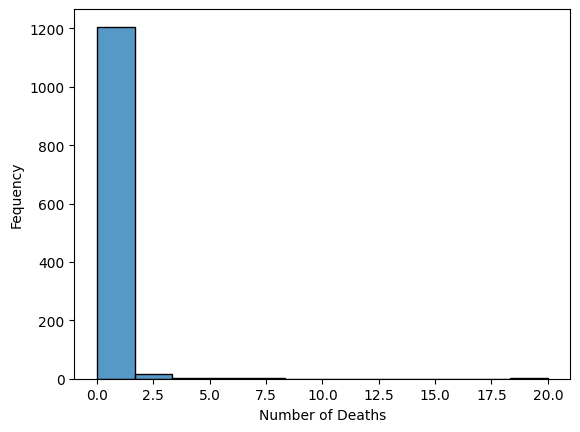

In [53]:
# Plotting the histogram using seaborn
sns.histplot(data=Rabies_df, x='Deaths')

# Adding labels and title
plt.xlabel('Number of Deaths')
plt.ylabel('Fequency')

# Display the Histogram plot
plt.show()

In [54]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Removing variables with too many missing values (Missing Values > 30%)
# Removing Qualitative variables which cannot be used in Machine Learning
Rabies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 1228
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   District                    1229 non-null   object 
 1   Month                       1229 non-null   object 
 2   Suspected cases in animals  1229 non-null   int64  
 3   Suspected bites by animals  1229 non-null   int64  
 4   Deaths                      1229 non-null   int64  
 5   Emergency vaccinations      1229 non-null   int64  
 6   Dogs                        1229 non-null   int64  
 7   Cats                        1229 non-null   int64  
 8   Pets destroyed              1229 non-null   int64  
 9   Rainfall                    1186 non-null   float64
 10  Water                       1186 non-null   float64
 11  Grazing                     1186 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 124.8+ KB


In [55]:

# Looking at the descriptive statistics of the data
Rabies_df.describe(include='all')

,District,Month,Suspected cases in animals,Suspected bites by animals,Deaths,Emergency vaccinations,Dogs,Cats,Pets destroyed,Rainfall,Water,Grazing
count,1229,1229,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1186.000000,1186.000000,1186.000000
unique,56,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARUA,31-Mar-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,61,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8.011391,7.529699,0.112286,5.074044,146.211554,7.298617,5.185517,2.574199,2.236088,2.427487
std,NaN,NaN,86.073192,11.425804,0.773389,16.968746,318.678267,26.655777,19.600649,1.393163,0.747370,1.146730
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000
50%,NaN,NaN,1.000000,3.000000,0.000000,0.000000,20.000000,0.000000,0.000000,3.000000,2.000000,3.000000
75%,NaN,NaN,7.000000,10.000000,0.000000,4.000000,132.000000,4.000000,2.000000,3.000000,3.000000,3.000000


In [56]:

# Removing duplicate rows if any
Rabies_df = Rabies_df.drop_duplicates()

In [57]:

# Finding how many missing values are there for each column
Rabies_df.isnull().sum()

District                       0
Month                          0
Suspected cases in animals     0
Suspected bites by animals     0
Deaths                         0
Emergency vaccinations         0
Dogs                           0
Cats                           0
Pets destroyed                 0
Rainfall                      43
Water                         43
Grazing                       43
dtype: int64

In [58]:

# replace missing values with mode
Rabies_df['Rainfall'] = Rabies_df['Rainfall'].fillna(Rabies_df['Rainfall'].mode()[0])
Rabies_df['Water'] = Rabies_df['Water'].fillna(Rabies_df['Water'].mode()[0])
Rabies_df['Grazing'] = Rabies_df['Grazing'].fillna(Rabies_df['Grazing'].mode()[0])

In [59]:

# Checking how many missing values are there for each column again
Rabies_df.isnull().sum()


District                      0
Month                         0
Suspected cases in animals    0
Suspected bites by animals    0
Deaths                        0
Emergency vaccinations        0
Dogs                          0
Cats                          0
Pets destroyed                0
Rainfall                      0
Water                         0
Grazing                       0
dtype: int64

In [60]:

# Droping 'District' and 'Month' columns
# Rabies_df = Rabies_df.drop('District', axis=1)
Rabies_df = Rabies_df.drop('Month', axis=1)



<Axes: >

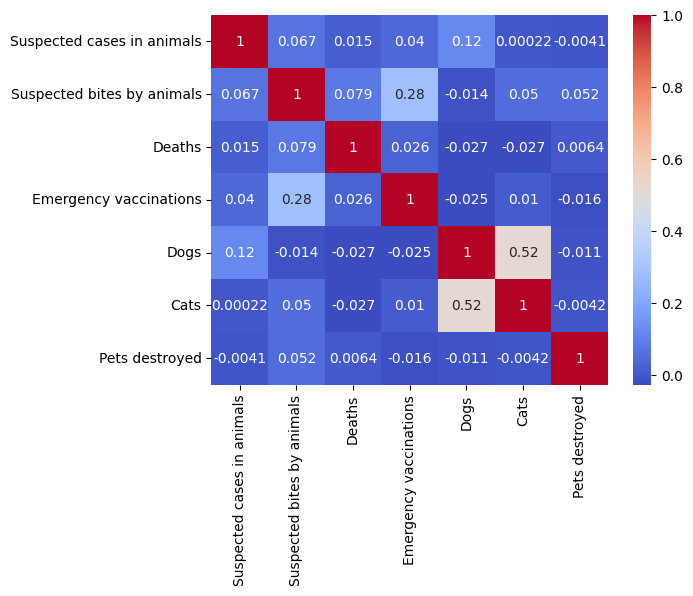

In [61]:

# Convert any columns with string values to numeric values

# Rabies_df['District'] = pd.to_numeric(Rabies_df['District'], errors='coerce')
# Rabies_df['Month'] = pd.to_numeric(Rabies_df['Month'], errors='coerce')


# Calculate the correlation matrix

selected_columns = ['Suspected cases in animals','Suspected bites by animals','Deaths','Emergency vaccinations','Dogs','Cats','Pets destroyed']
corr_matrix  = Rabies_df[selected_columns].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')



In [62]:
from sklearn.preprocessing import OrdinalEncoder

# Define the mapping of categories to labels
district_labels = {
     'AMUDAT': 1,
    'BUGWERI': 2,
    'BULIISA': 3,
    'BULAMBULI': 4,
    'KOTIDO': 5,
    'IBANDA': 6,
    'IGANGA': 7,
    'KOBOKO': 8,
    'LUWERO': 9,
    'MBALE': 10,
    'MOROTO': 11,
    'MOYO': 12,
    'MUKONO': 13,
    'RAKAI': 14,
    'TORORO': 15,
    'NABILATUK': 16,
    'KYENJOJO': 17,
    'RUKUNGIRI': 18,
    'YUMBE': 19,
    'NAMUTUMBA': 21,
    'BUSIA': 22,
    'ABIM': 24,
    'KUMI': 25,
    'LUUKA': 26,
    'ARUA': 27,
    'KABERAMAIDO': 28,
    'KIBOGA': 29,
    'NAKAPIRIPIRITI': 30,  # Corrected label for 'NAKAPIRIPIRITI'
    'SEMBABULE': 31,
    'KAMULI': 32,
    'KIBAALE': 33,
    'LIRA': 34,
    'KAPCHORWA': 35,
    'MPIGI': 36,
    'KASESE': 37,
    'KITGUM': 38,
    'BUGIRI': 39,
    'JINJA': 40,
    'HOIMA': 41,
    'KANUNGU': 42,
    'BUSHENYI': 43,
    'MBARARA': 44,
    'NEBBI': 45,
    'KAYUNGA': 46,
    'KAMPALA': 47,
    'PADER': 48,
    'MUBENDE': 49,
    'MASINDI': 50,
    'RABIES': 51,
    'SOROTI': 52,
    'ADJUMANI': 53,
    'WAKISO': 54,
    'KABAROLE': 55,
    'BUNDIBUGYO': 56,
    'GULU': 57,
    'KALANGALA': 58,
    'NTUNGAMO': 59,
    'KATAKWI': 60,
    'MAYUGE': 61,
    'KAMWENGE': 62,
    'SIRONKO': 63,
    'KABALE': 64,
    'NAKASONGOLA': 65,
    'PALLISA': 66,
    'MASAKA': 67,
    'APAC': 68,
    'NAKASONGOLAQ': 69,  # Corrected label for 'NAKASONGOLAQ'
    'KISORO': 70
}


# Replace the values in 'District' column using the dictionary
Rabies_df['District'].replace(district_labels, inplace=True)
Rabies_df.head()


,District,Suspected cases in animals,Suspected bites by animals,Deaths,Emergency vaccinations,Dogs,Cats,Pets destroyed,Rainfall,Water,Grazing
0,11,6,16,0,16,20,2,0,1.0,1.0,1.0
1,5,0,0,0,0,318,3,0,1.0,1.0,1.0
2,55,0,0,0,0,273,0,0,2.0,3.0,3.0
3,45,2,2,0,0,0,0,0,1.0,2.0,2.0
4,29,0,0,0,0,136,1,0,3.0,2.0,1.0


In [63]:

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = Rabies_df.drop("Deaths", axis=1)
y = Rabies_df["Deaths"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure that X_train and y_train have the same indices
y_train = y_train.loc[X_train.index]

In [65]:

from sklearn.preprocessing import OrdinalEncoder

categorical_cols = ["District", "Rainfall", "Water", "Grazing"]

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[[col]])
    X_test[col] = encoder.transform(X_test[[col]])



In [66]:


X_train.head(200)


,District,Suspected cases in animals,Suspected bites by animals,Emergency vaccinations,Dogs,Cats,Pets destroyed,Rainfall,Water,Grazing
735,6.0,2,0,10,430,61,0,3.0,2.0,2.0
352,18.0,3,3,0,0,0,2,3.0,2.0,3.0
691,23.0,0,0,0,24,0,0,2.0,3.0,3.0
506,44.0,0,0,0,78,7,0,1.0,2.0,2.0
1065,29.0,0,0,0,91,0,0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
370,36.0,0,0,3,0,0,0,4.0,3.0,3.0
239,35.0,0,6,0,0,0,0,2.0,2.0,2.0
1129,17.0,1,1,1,0,0,1,2.0,2.0,3.0
663,3.0,0,56,0,0,0,0,3.0,3.0,3.0


In [67]:
# Scaling the features
from sklearn.preprocessing import StandardScaler

continuous_cols = ["Suspected cases in animals", "Suspected bites by animals", "Emergency vaccinations", "Dogs", "Cats", "Pets destroyed"]

scaler = StandardScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])


# Drop the Null values if any
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train[X_train.index]


# Print the shapes of the datasets
print("Shape of X_train:", np.shape(X_train))
print("Shape of y_train:", np.shape(y_train))
print("Shape of X_test:", np.shape(X_test))
print("Shape of y_test:", np.shape(y_test))



Shape of X_train: (971, 10)
Shape of y_train: (971,)
Shape of X_test: (243, 10)
Shape of y_test: (243,)


In [68]:

# Train and evaluate a model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create an instance of the regression algorithm:
linear_model = LinearRegression()

#Fit the model to the training data:
linear_model.fit(X_train, y_train)

# Make predictions on the training & test data:
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# Mean Squared Error
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))


Train MSE: 0.7111259875072525
Test MSE: 0.12420382289253


In [69]:
from sklearn.metrics import r2_score

# Calculate R-squared for the test data
r2 = r2_score(y_test, y_pred_test)

# Calculate the number of features in the model
num_features = X_test.shape[1]

# Calculate the number of data points in the test set
num_data_points = len(y_test)

# Calculate the adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (num_data_points - 1) / (num_data_points - num_features - 1)

print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)


R-squared: -0.04266584276101826
Adjusted R-squared: -0.08760833598347584


In [70]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Create a Lasso model with alpha = 0.5
lasso_reg = Lasso(alpha=0.5)

# Train the Lasso model on the training data
lasso_reg.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression MSE on Test Data: {:.3f}".format(mse_lasso))

# Create a Ridge model with alpha = 0.5
ridge_reg = Ridge(alpha=0.5)

# Train the Ridge model on the training data
ridge_reg.fit(X_train, y_train)

# Evaluate the Ridge model on the test data
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression MSE on Training Data: {:.3f}".format(mse_ridge))


Lasso Regression MSE on Test Data: 0.121
Ridge Regression MSE on Training Data: 0.124


In [71]:
# Train and evaluate a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

print(X_train.columns)
print(X_test.columns)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

# Making Table report
from tabulate import tabulate

# Generate classification reports
train_report = classification_report(y_train, y_pred_train)
test_report = classification_report(y_test, y_pred_test)

# Format reports as tables
train_table = tabulate([["Train Report:"], [train_report]], headers="firstrow", tablefmt="fancy_grid")
test_table = tabulate([["Test Report:"], [test_report]], headers="firstrow", tablefmt="fancy_grid")

# Print the tables
print(train_table)
print(test_table)


Index(['District', 'Suspected cases in animals', 'Suspected bites by animals',
       'Emergency vaccinations', 'Dogs', 'Cats', 'Pets destroyed', 'Rainfall',
       'Water', 'Grazing'],
      dtype='object')
Index(['District', 'Suspected cases in animals', 'Suspected bites by animals',
       'Emergency vaccinations', 'Dogs', 'Cats', 'Pets destroyed', 'Rainfall',
       'Water', 'Grazing'],
      dtype='object')
╒═══════════════════════════════════════════════════════╕
│ Train Report:                                         │
╞═══════════════════════════════════════════════════════╡
│ precision    recall  f1-score   support               │
│                                                       │
│            0       0.94      1.00      0.97       914 │
│            1       0.00      0.00      0.00        37 │
│            2       0.00      0.00      0.00        10 │
│            3       0.00      0.00      0.00         3 │
│            4       0.00      0.00      0.00         2 │
│   

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from tabulate import tabulate

# Assuming you have already defined X_train, y_train, X_test, and y_test

# Train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on training and test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generate classification reports
train_report = classification_report(y_train, y_pred_train)
test_report = classification_report(y_test, y_pred_test)

# Format reports as tables
train_table = tabulate([["Train Report:"], [train_report]], headers="firstrow", tablefmt="fancy_grid")
test_table = tabulate([["Test Report:"], [test_report]], headers="firstrow", tablefmt="fancy_grid")

# Print the tables
print(train_table)
print(test_table)


╒═══════════════════════════════════════════════════════╕
│ Train Report:                                         │
╞═══════════════════════════════════════════════════════╡
│ precision    recall  f1-score   support               │
│                                                       │
│            0       1.00      1.00      1.00       914 │
│            1       1.00      1.00      1.00        37 │
│            2       1.00      1.00      1.00        10 │
│            3       1.00      1.00      1.00         3 │
│            4       1.00      1.00      1.00         2 │
│            6       1.00      1.00      1.00         1 │
│            7       1.00      1.00      1.00         3 │
│           20       1.00      1.00      1.00         1 │
│                                                       │
│     accuracy                           1.00       971 │
│    macro avg       1.00      1.00      1.00       971 │
│ weighted avg       1.00      1.00      1.00       971 │
╘═════════════

In [73]:
# Train and evaluate a model
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras import regularizers


# define the model
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
# Regulization
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=32)


# evaluate the model
train_mse = model.evaluate(X_train, y_train)
test_mse = model.evaluate(X_test, y_test)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)




Epoch 1/100
31/31 [==============================] - 1s 2ms/step - loss: 28.0853
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 18.8068
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 12.7713
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 7.3600
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 5.3436
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 5.2706
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 4.4564
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 3.4170
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 2.8402
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 2.7923
Epoch 11/100
31/31 [==============================] - 0s 3ms/step - loss: 2.2221
Epoch 12/100
31/31 [==============================] - 0s 2ms/step - loss: 2.2842
Epoch 13/100
31/31 [==============

In [74]:
from sklearn.metrics import r2_score

# Calculate R-squared for training data
r2_train = r2_score(y_train, y_pred_train)
print("R-squared (train):", r2_train)

# Calculate R-squared for test data
r2_test = r2_score(y_test, y_pred_test)
print("R-squared (test):", r2_test)


R-squared (train): 1.0
R-squared (test): -2.5928348023883987


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tabulate import tabulate

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions using Random Forest model
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy metrics for Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

# Print the accuracy metrics
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)
print("Random Forest Classification Report:")
print(rf_classification_report)

Random Forest Accuracy: 0.9547325102880658
Random Forest Confusion Matrix:
[[232   0   0   0]
 [  8   0   0   0]
 [  1   0   0   0]
 [  2   0   0   0]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       232
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2

    accuracy                           0.95       243
   macro avg       0.24      0.25      0.24       243
weighted avg       0.91      0.95      0.93       243



In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tabulate import tabulate

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions using Gradient Boosting model
gb_predictions = gb_model.predict(X_test)

# Calculate accuracy metrics for Gradient Boosting model
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_confusion_matrix = confusion_matrix(y_test, gb_predictions)
gb_classification_report = classification_report(y_test, gb_predictions)

# Print the accuracy metrics

print("Gradient Boosting Accuracy:", gb_accuracy)

print("Gradient Boosting Confusion Matrix:")

print(gb_confusion_matrix)

print("Gradient Boosting Classification Report:")

print(gb_classification_report)


Gradient Boosting Accuracy: 0.9423868312757202
Gradient Boosting Confusion Matrix:
[[228   2   0   2]
 [  7   1   0   0]
 [  1   0   0   0]
 [  1   1   0   0]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       232
           1       0.25      0.12      0.17         8
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2

    accuracy                           0.94       243
   macro avg       0.30      0.28      0.28       243
weighted avg       0.93      0.94      0.93       243



In [78]:
import pickle

# Save the model to a file wb(write binary)
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


In [79]:

import pickle

# Load the model from the file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)


In [80]:


def make_prediction(input_data):
    # Preprocess the input_data if required


    # Use the loaded model to make predictions
    predictions = model.predict(input_data)

    # Return the predictions
    return print("There might be" ,predictions[0], " Death(s) likely to occur" )